 # Data Programming with Python - Final Project
 # The Dublin Difference

### 1. Introduction

The 2016 Irish Census was held on Sunday, 24 April 2016. It recorded a total population in the country of 4,761,865, up from 4,588,252 in the previous 2011 census. It recorded information from the public on a myriad of topics including Sex, Marital Status, Age, Standard of Housing, Family Structure, Social Class, Commuting, Ethnicity, Occupation and Level of Education. This was achieved through the administering of the 2016 Census form, which was collected by Central Statistic Office (CSO) enumerators. Seperated into 15 themes, this is a considerable amount of data  to  record and analyse. It took over a year and a half for numerous reports to be published on the data by the CSO.

The topic I have decided to cover is that of the difference between Dublin and the rest of Ireland. Dublin is the capital of Ireland and has been the most highly populated county since surpassing Cork in 1901. Today, it now has a population 2 and half times the size of Cork, which is still the second largest county (in the Republic) by population. Dublin now has 802,534 more people than Cork and 28.3% of the population. However, Dublin remains the 30th largest of the 32 counties. To counteract the challenges to Dublin's infrastructure, a considerable amount of large scale building development has taken place. This has been supported by Dublin having it's own exclusive transport systems including the DART railway lines and LUAS tramlines. I believe that it is fair to say that Dublin is a distinctly different enviroment to the rest of Ireland, specifically in terms of how people move around and how people work. 

The themes I have chosen to study are Theme 11: Commuting and Theme 13: Occupation. The first area, Theme 11 includes data that outlines how the population aged 5 years and over travel to work, school or college. Specifically information measuring the commuting patterns of the population and covers modes of travel, journey times and time of departure for both workers and students. It is notable that this seperates between students and workers, meaning that we can accurately investigate the differences between the two groups in both Dublin and outside of Dublin. Our second area, Theme 13, outlines data regarding persons at work by occupation, with occupations seperated from specific industries and taken broadly in line with the skills required. This theme will allow us to spot the differences between the Dublin and Non-Dublin worker and see how they change with distinctly different transport networks. 

I have 2 key objectives with this analysis that I aim to achieve:

1. I aim to explore the differences between travelling and working in and outside of Dublin. Specifically educating myself on the options for movement outside of Dublin. Dublin's distinctly seperate transport systems can lead to a biasing of what is available for movement in the rest of the country. This project is an opportunity to look at the objective facts of how people moved as of 2016 and allows us to draw our conclusions from more tangible information than we would otherwise have. 

2. I aim to use how people travel as a way of predicting how they work and the potential changes that distinctly different transport networks can have on the type of work of a population. I hope that this investigation can find any possible inequalities between these 2 systems. Dublin as of this census still remained the highest growing county in the Republic. If this persists and there is potential inequity between itself and the other counties, a growing population may only be exacerbating the divide between the capital and the rest of the country. If transport networks are shown to predict occupations and transport networks are distributed equitably, there should be no difference in occupations between Dublin and the rest of the country. 

### 2. Data Cleaning/Pre-processing

First let's load in the packages we will be using for our analysis. 

In [90]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

I will now load in the data set. 

In [47]:
path = 'C:/Users/matth/Documents/Python Scripts/Final Project/'
df = pd.read_csv(path+'Census_by_county2.csv',index_col='GEOGDESC')

For this project, we were given 2 datasets one by county councils and one by electoral area. I decided to focus my analysis on the County Council data predominantly as I feel it condenses a lot of the individual county's data.

For this investigation, we want to focus on Theme 11 and 13. This means we will be dropping themes 1-10, 12 and 14-15. We will also be checking for any potential missing values in our resulting dataset. Subsequently we will split our dataset into a Dublin dataset (df_Dublin) and a Non-Dublin dataset (df_Else). This is so we can analyse the difference between the two groups and discuss the potential ramifications of those findings. 

In [48]:
# Dropping our other themes as well as our guiding variables.
df_1 = df.drop(df.loc[:, 'T1_1AGE0M':'T10_4_TT'].columns, axis = 1)
df_1 = df_1.drop(df.loc[:, 'T12_1_M':'T12_3_TT'].columns, axis = 1)
df_1 = df_1.drop(df.loc[:, 'T14_1_AFFM':'T15_3_T'].columns, axis = 1)
df_1 = df_1.drop(df.loc[:, 'GUID':'GEOGID'].columns, axis = 1)

In [49]:
# Here we can see that we have no missing data.
df_1.isnull().sum().sum()

0

In [50]:
# Seperating our unwanted observations. 
df_Else = df_1[df_1.index != 'South Dublin']
df_Else = df_Else[df_Else.index != 'Dublin City']
df_Else = df_Else[df_Else.index != 'Dun Laoghaire-Rathdown']
df_Else = df_Else[df_Else.index != 'Fingal']

In [51]:
# Selecting our Dublin entries.
df_Dublin = df_1.loc[["Dublin City","South Dublin","Dun Laoghaire-Rathdown","Fingal"]]

### 3. Exploratory Data Analysis
##### Theme 11: Commuting

In [52]:
# Observe our data set. 
df_1.head()

,T11_1_FW,T11_1_BIW,T11_1_BUW,T11_1_TDLW,T11_1_MW,T11_1_CDW,T11_1_CPW,T11_1_VW,T11_1_OTHW,T11_1_WMFHW,...,T13_1_POT,T13_1_APTOT,T13_1_ASOT,T13_1_STOT,T13_1_CLOSOT,T13_1_SCSOT,T13_1_PPMOT,T13_1_EOT,T13_1_NST,T13_1_TT
GEOGDESC,,,,,,,,,,,,,,,,,,,,,
Cork City,9870,1848,5293,242,214,23277,2734,1671,99,1095,...,10835,6731,4745,5364,3854,6220,4022,6156,7414,58507
Clare,2938,509,542,91,108,32416,2079,3587,337,3434,...,8941,5542,5472,10164,4285,3285,4341,4521,5230,55863
Cork County,9792,1318,3133,1038,551,122557,7094,13283,1380,11749,...,35269,21858,18440,33961,14365,13076,16303,14782,13512,196350
Cavan,1851,141,425,55,27,19247,1422,3299,348,1940,...,4492,2651,3241,7661,2761,1889,3601,3290,3505,35319
Carlow,1633,242,189,224,36,13780,1108,1858,184,1418,...,3329,2276,2189,4575,1981,1811,2175,2577,3392,26046


The first variables we want to focus on are our total modes of travel. Understanding the distributions of these variables between Dublin and Non-Dublin is vital for our understanding of the big picture of our data. I will first classify our desired variables under our Ireland(x), Non-Dublin(Y) and Dublin(Z) datasets. I will then use the plotting in matplotlib.pyplot to plot bar charts of the 3 distributions and interpret. The census found the population of Dublin county to be 1,347,359 and therefore the rest of Ireland will have a population of 3,414,506. I will adjust our variables by dividing by these populations to give us a better understanding of the average persons travel habits. 

In [53]:
X = df_1[['T11_1_FT','T11_1_BIT','T11_1_BUT','T11_1_TDLT','T11_1_MT','T11_1_CDT','T11_1_CPT','T11_1_VT','T11_1_OTHT','T11_1_WMFHT','T11_1_NST']].sum()/47618.65
Y = df_Else[['T11_1_FT','T11_1_BIT','T11_1_BUT','T11_1_TDLT','T11_1_MT','T11_1_CDT','T11_1_CPT','T11_1_VT','T11_1_OTHT','T11_1_WMFHT','T11_1_NST']].sum()/34145.06
Z = df_Dublin[['T11_1_FT','T11_1_BIT','T11_1_BUT','T11_1_TDLT','T11_1_MT','T11_1_CDT','T11_1_CPT','T11_1_VT','T11_1_OTHT','T11_1_WMFHT','T11_1_NST']].sum()/13473.59

Text(0.5, 1.0, 'Barplot plot of Total Travelling by method in Ireland')

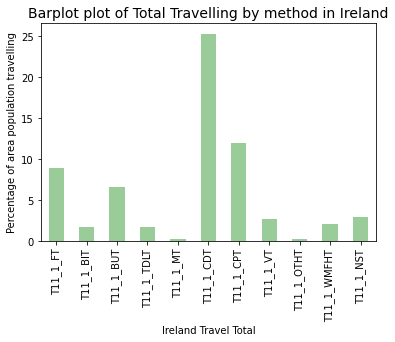

In [54]:
X.plot(kind ='bar',color='g',alpha=0.4)
plt.xlabel('Ireland Travel Total')
plt.ylabel('Percentage of area population travelling')
plt.title('Barplot plot of Total Travelling by method in Ireland',fontsize=14)

Text(0.5, 1.0, 'Barplot plot of Total Travelling by method outside of Dublin')

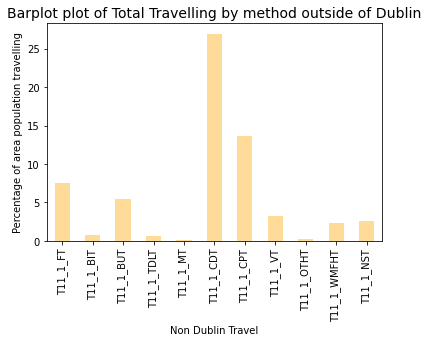

In [55]:
Y.plot(kind ='bar',color='orange',alpha=0.4)
plt.xlabel('Non Dublin Travel')
plt.ylabel('Percentage of area population travelling')
plt.title('Barplot plot of Total Travelling by method outside of Dublin',fontsize=14)

Text(0.5, 1.0, 'Barplot plot of Total Travelling by method in Dublin')

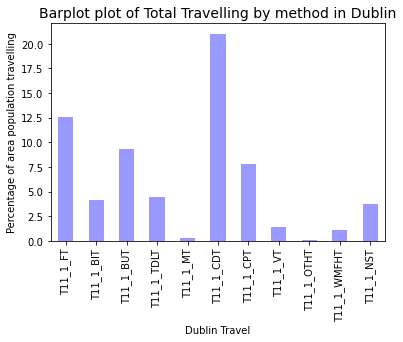

In [56]:
Z.plot(kind ='bar',color='b',alpha=0.4)
plt.xlabel('Dublin Travel')
plt.ylabel('Percentage of area population travelling')
plt.title('Barplot plot of Total Travelling by method in Dublin',fontsize=14)

In [57]:
# Adding up all percentages of each distribution. 
X.sum()

64.2312833312158

In [58]:
Y.sum()

63.539235251014354

In [59]:
Z.sum()

65.98508638009618

In [60]:
# Non-Dublin driver percentage over Dublin driver percentage we see is just over 28%.
# Van Drivers are twice as common outside of Dublin.
# There are 74.5% more car passengers per person outside of Dublin than in Dublin.
Y/Z

T11_1_FT       0.596341
T11_1_BIT      0.183856
T11_1_BUT      0.591353
T11_1_TDLT     0.146663
T11_1_MT       0.348201
T11_1_CDT      1.281387
T11_1_CPT      1.744530
T11_1_VT       2.281738
T11_1_OTHT     3.501367
T11_1_WMFHT    2.179873
T11_1_NST      0.685094
dtype: float64

In [61]:
# Five percent more Dubliners walk to work, school or college. 
Z[['T11_1_FT']] - Y[['T11_1_FT']]

T11_1_FT    5.084811
dtype: float64

In [62]:
# Dublin travelers are 5.4 times more likely to cycle.
# Motorcycles and Scooters are 3 times as common in Dublin.
# Dubliners are almost 6.82 times more likely to travel by Train, Dart or Luas. 
Z/Y

T11_1_FT       1.676894
T11_1_BIT      5.439032
T11_1_BUT      1.691037
T11_1_TDLT     6.818367
T11_1_MT       2.871907
T11_1_CDT      0.780405
T11_1_CPT      0.573220
T11_1_VT       0.438262
T11_1_OTHT     0.285603
T11_1_WMFHT    0.458742
T11_1_NST      1.459655
dtype: float64

It should first be noted that percentages used in these graphs do not add up to the same values as not everyone will be traveling to work or college. Using the sum function, we can find that Total Ireland, Non-Dublin and Dublin data adds up 64.23, 63.54 and 65.99% respectively. We can draw from this that people in Dublin are more likely to work or attend schooling than Non-Dublin people. This should not affect our findings as long as we state them in terms of the total population for the area. When travelling is used in our analysis, it should not be construed with recreational or non-work/school/college travel. 

Adjusting for population, there is a noticable difference between the transportation used in Dublin and the rest of Ireland. Non-Dublin heavily skews towards the use of cars and vans. There are over twice as many van drivers per person. Comparing percentage to percentage, there are 28% more Non Dubliners driving to work/college. Furthermore, there are 74.5% more car passengers per person outside of Dublin than in Dublin.  This is likely due to the longer distances one has to travel in the rest of the country compared to the densely populated city of Dublin. It may also be related to there being less traffic in the rest of the country than to Dublin. 

Dublin has a much broader range of taken transportation. Five percent more of the population walk to work, school or college. Dublin travelers are 5.4 times more likely to cycle according to our charts. The afformentioned dense population and traffic of Dublin is likely the reason for this. However being able to walk to work or college is likely a function of distance over anything else. It would seem intuitive that built up city areas have people living closer to work or schooling. Someone living on a campus can walk to their college. It may be worth investigating the differences between walking for specifically the student vs worker variables. Lastly, Dublin people are almost 7 times more likely to travel by train, dart or luas. This is easy to understand as the LUAS and DART are exclusively parts of the transport services of Dublin and there are less train services outside of the county. 

A finding that seemed particulary suprising was that Motorcycles and Scooters are almost 3 times as common in Dublin than in the rest of the country. These vehicles are capable of travelling long distances at great speed, however it may indicate that they are not commonly used for this purpose when used for work, school or college. This may be due to the lack of storage these vehicles have, particularly that needed for longer journeys. Another explanation may be that when children need to be transported, the less motorcycles and scooters are used, as outside of Dublin, there are less travel options for children. It may be that parents forego their motorcycle or scooter in exchange for a car that can carry their children, due to this lack of freedom. According to the Citizens Information website, motorcyclists represent less than 2% of all licensed vehicle drivers in the country, yet they account for 12% of road fatalities. It may be that while they are willing to put themselves at risk, motorcyclists are less willing to put their children in that risk. It should also be noted that Dubliners were more likely not to state how they travel. We will investigate the differences between the workers and students data in order to spot any patterns that may aid our understanding here. 

1. https://www.citizensinformation.ie/en/travel_and_recreation/roads_and_safety/safety_advice_for_motorcyclists.html

As discussed, let's investigate whether Dublin students walk disproportionately more to other students.

In [63]:
# Students walking to schooling as a percentage of populations
A = df_Else[['T11_1_FS']].sum()/34145.06
B = df_Dublin[['T11_1_FS']].sum()/13473.59

In [64]:
B/A

T11_1_FS    1.629181
dtype: float64

Here we can see that Dublin students walk 62.9% more than students outside of Dublin. Now let's compare this to workers. 

In [65]:
C = df_Else[['T11_1_FW']].sum()/34145.06
D = df_Dublin[['T11_1_FW']].sum()/13473.59

In [66]:
D/C

T11_1_FW    1.747275
dtype: float64

We can see that the average Dublin worker actually walks disproportionately more to work than the average Dublin student walks to schooling when compared to Non-Dubliners. This may actually indicate that students outside of Dublin live closer to school than they do to work. This seems almost counterintuitive. It may be worth exploring if college students are more likely to live nearer to campus outside of Dublin than inside. This is a possible explanation to this difference. Another may be that workers without children live closer to walking distance to work than outside of Dublin. However, this explanation is not convincing to me as many students in Dublin go to school in their local area, while many workers work in the city centre.

Using general internet resources for these colleges, I have compiled data in relation to student population of all colleges at or around 2016. These are the universities specifically as defined specifically under the Universities Act, 1997. Furthermore, I have taken Student Accommodation data from 2014 as laid out in the HEA REPORT ON STUDENT ACCOMMODATION: DEMAND & SUPPLY. While the data is not directly in line with the time of our census, it is not considerable distant from it to warrant saying extrapolations from analysing it are without merit. 

I will now create data sets regarding both pieces of data to decide which area has more students in the near vacinity. 

2. https://hea.ie/assets/uploads/2017/06/Report-on-Student-Accommodation-Demand-Supply.pdf

In [67]:
# Creating a dataset of the number of students attending colleges outside of Dublin. 
College_Else = {'College':['MTU','MU','NUIG','UCC','TUS','UL'],
               'Students':[18000,13760,17318,19400,14000,16000]}
College_Else = pd.DataFrame(College_Else)
College_Else

,College,Students
0,MTU,18000
1,MU,13760
2,NUIG,17318
3,UCC,19400
4,TUS,14000
5,UL,16000


In [68]:
# Creating a dataset of the number of students attending colleges in Dublin. 
College_Dublin = {'College':['DCU','UCD','RCSI','TUD','TCD'],
               'Students':[17000,33321,4094,28500,16425]}
College_Dublin = pd.DataFrame(College_Dublin)
College_Dublin

,College,Students
0,DCU,17000
1,UCD,33321
2,RCSI,4094
3,TUD,28500
4,TCD,16425


Combined Public and Private Dublin accommadation is 10,287 as outline in the HEA report.

In [69]:
# Creating a dataset of the number of students attending colleges outside of Dublin in Private and Public accommodation. 
Accom_Else = {'Location':['Cork','Galway','Limerick','Waterford','Other'],
               'Students':[3788,3230,6816,2365,4810]}
Accom_Else = pd.DataFrame(Accom_Else)
Accom_Else

,Location,Students
0,Cork,3788
1,Galway,3230
2,Limerick,6816
3,Waterford,2365
4,Other,4810


In [70]:
College_Dublin.sum()

College     DCUUCDRCSITUDTCD
Students               99340
dtype: object

In [71]:
# Number of Dublin students in accommodation divided by student population. 
10287/99340

0.10355345278840346

In [72]:
# Number of Non-Dublin students in accommodation divided by student population. 
Accom_Else.sum()/College_Else.sum()

College          NaN
Location         NaN
Students    0.213337
dtype: object

From my research, it appears that 10.36% of Students in 2014 lived on nearby private/public campus accomodation in Dublin. Ouside of Dublin however, 22.57% lived on nearby private/public campus. This difference may partially explain why workers disproportionately walk more to work in Dublin compared to Outside of Dublin than Students do. 

Let's further investigate the differences between the Student and Worker data and see if we can find any further relationships.

In [73]:
XW = df_1[['T11_1_FW','T11_1_BIW','T11_1_BUW','T11_1_TDLW','T11_1_MW','T11_1_CDW','T11_1_CPW','T11_1_VW','T11_1_OTHW','T11_1_WMFHW','T11_1_NSW']].sum()/47618.65
XS = df_1[['T11_1_FS','T11_1_BIS','T11_1_BUS','T11_1_TDLS','T11_1_MS','T11_1_CDS','T11_1_CPS','T11_1_VS','T11_1_OTHS','T11_1_WMFHS','T11_1_NSS']].sum()/47618.65

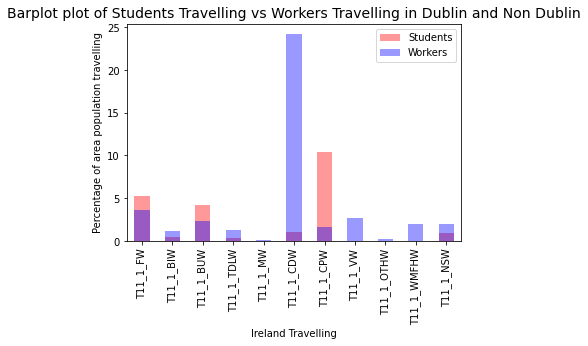

In [74]:
# Overlapping bar chart with legend.
plt.figure()
XS.plot(kind ='bar',color='r',alpha=0.4,label='Students')
XW.plot(kind ='bar',color='b',alpha=0.4,label='Workers')
plt.xlabel('Ireland Travelling')
plt.ylabel('Percentage of area population travelling')
plt.title('Barplot plot of Students Travelling vs Workers Travelling in Dublin and Non Dublin',fontsize=14)
plt.legend()

Here we can see that students are more likely to be passengers, walk on foot and use buses. Workers are fair more likely to be drivers, which is expected as well as all other forms of transport. 

The first clear relationship that we can spot here is that students are far more likely to be passengers and workers are far more likely to be drivers. We should be interested in investigating whether there is a correlation between these variables is different for Dublin compared to Non-Dublin as this would seem like a particularly strong relationship. This will be covered in our statistical analysis section. 

##### Theme 13: Occupations

We will now outline our occupations using the same overlapping bar chart method we used for theme 11. This will give us a good overview of which occupations fall under Dublin and Non-Dublin workers. 

In [75]:
Occ_Dub = df_Dublin[['T13_1_MDSOT','T13_1_POT','T13_1_APTOT','T13_1_ASOT','T13_1_STOT','T13_1_CLOSOT','T13_1_SCSOT','T13_1_PPMOT','T13_1_EOT','T13_1_NST',]].sum()/13473.59
Occ_Else = df_Else[['T13_1_MDSOT','T13_1_POT','T13_1_APTOT','T13_1_ASOT','T13_1_STOT','T13_1_CLOSOT','T13_1_SCSOT','T13_1_PPMOT','T13_1_EOT','T13_1_NST',]].sum()/34145.06

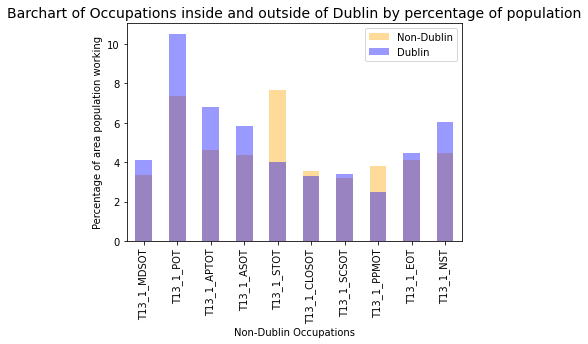

In [76]:
plt.figure()
Occ_Else.plot(kind ='bar',color='orange',alpha=0.4, label = "Non-Dublin")
Occ_Dub.plot(kind ='bar',color='b',alpha=0.4, label = "Dublin")
plt.xlabel('Non-Dublin Occupations',fontsize=10)
plt.ylabel('Percentage of area population working',fontsize=10)
plt.title('Barchart of Occupations inside and outside of Dublin by percentage of population',fontsize=14)
plt.legend()

Our Barchart tells us that Dublin based workers are more likely to be involved in office based occupations. Most commonly Professional, Associate Professional, Administrative and Secretarial occupations. It is also interesting to note that this is the second time that Dubliners have more likely to not state an answer for the given question. Meanwhile, Non-Dubliners are considerably more likely to be involved in skilled trades or to be processed plants or machine operatives. This considerable focus on trades may explain the particularly high volumes of van drivers in Non-Dublin compared to Dublin. It is worth investigating this. This will be covered in our statistical analysis section. 

### 4. Statistical Analysis

From our Explanatory Data Analysis, there are two clear relationships we want to explore. That being the relationship between Car Worker Drivers and Car Student Passenger. As well as the relationsip between Trade workers and Van travellers. 

We will do this by first calculating the coorelation between the two variables.The correlation will give us the relationship between two variables/datasets, and how strong that relationship may be. Then we will create a Scatterplot of the variables against each other coloured by Dublin and Non-Dublin variables.

Our current interpretation of our data would imply students are less likely to be correlated as passengers with worker drivers in Dublin. We will use the corrcoef function for our correllation coefficients.

In [77]:
np.corrcoef(df_Dublin.T11_1_CPS,df_Dublin.T11_1_CDW)

array([[1.        , 0.75914679],
       [0.75914679, 1.        ]])

In [78]:
np.corrcoef(df_Else.T11_1_CPS,df_Else.T11_1_CDW)

array([[1.        , 0.99117043],
       [0.99117043, 1.        ]])

Rather surprisingly, we can see an almost perfect corellation. This would indicate the highest possible positive relationship between Student Car Passengers and Worker Car Drivers outside of Dublin. This is not as much the case in Dublin. However this may be due to our lack of observations in our dataset. Lets map out our regression line by area. We will seperate our observations by our datasets. 

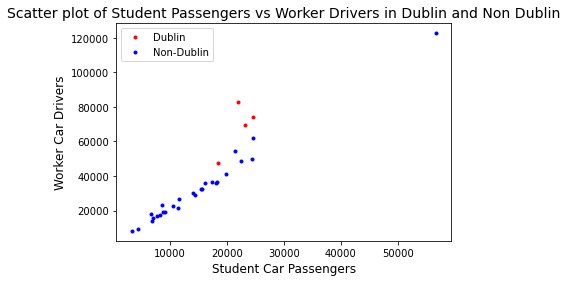

In [79]:
plt.figure()
plt.plot(df_Dublin.T11_1_CPS,df_Dublin.T11_1_CDW,color='r',linestyle='None',marker='.',label='Dublin')
plt.plot(df_Else.T11_1_CPS,df_Else.T11_1_CDW,color='b',linestyle='None',marker='.',label='Non-Dublin')
plt.ylabel('Worker Car Drivers',fontsize=12)
plt.xlabel('Student Car Passengers',fontsize=12)
plt.title('Scatter plot of Student Passengers vs Worker Drivers in Dublin and Non Dublin',fontsize=14)
plt.legend()

Despite us lacking data for Dublin, there is seemingly a different pattern for Dublin. All of our Dublin data is higher in car drivers given a certain level of student passengers. This would seem to support our claim that Dublin Students are taking alternative forms of transport compared to Non-Dublin students. This is therefore is dragging up our regression line.

We are now going to investigate the relationship between Van Travellers and Trade Workers. 

In [128]:
np.corrcoef(df_Dublin.T11_1_VT,df_Dublin.T13_1_STOT)

array([[1.        , 0.82169038],
       [0.82169038, 1.        ]])

In [129]:
np.corrcoef(df_Else.T11_1_VT,df_Else.T13_1_STOT)

array([[1.        , 0.98233805],
       [0.98233805, 1.        ]])

Here we see a strong positive relationship between Van Drivers and Trade Workers specifically outside of Dublin. As well as a distinctly lower relationship in Dublin. We will now create a scatterplot and interpret. 

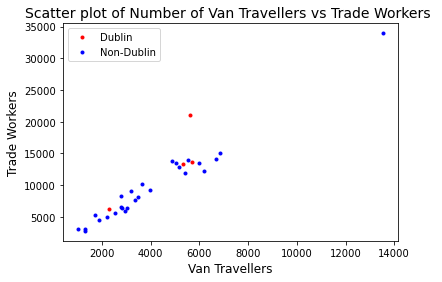

In [130]:
plt.figure()
plt.plot(df_Dublin.T11_1_VT,df_Dublin.T13_1_STOT,color='r',linestyle='None',marker='.',label='Dublin')
plt.plot(df_Else.T11_1_VT,df_Else.T13_1_STOT,color='b',linestyle='None',marker='.',label='Non-Dublin')
plt.ylabel('Trade Workers',fontsize=12)
plt.xlabel('Van Travellers',fontsize=12)
plt.title('Scatter plot of Number of Van Travellers vs Trade Workers ',fontsize=14)
plt.legend()

Interestingly, our Dublin data and Non-Dublin data is relatively uniform in displaying a correlation between the Number of Van drivers and the number of Trade Workers. Dublin City is the one notable outlier with a disproportionately high amount of trade workers to Van Travellers. It may be easy to discount this outlier as a densely populated area (in fact Dublin City has the highest population density in Ireland) and therefore has less trade workers traveling by van. However the rest of Dublin is densely populated and does seem to subscribe to the rest of the data. After all, most trade workers have to carry supplies and tools to every job regardless of the area. 

A potential explanation for Dublin City's status as an outlier may be it's considerable amount of high rise office buidings. From my research 9 of the 14 tallest buildings in the country belong in Dublin. 8 of these 9 buildings are located in Dublin City. These office buidings require a constant assortment of Trades people to maintain it's facilaties. However, unlike the rest of the counties, these offices can carry storage facilities for these supplies and equipment. This means vans to transport these supplies for these workers will not be so neccessary. This is only a potential explanation, but we should keep this in mind in our analysis of our Multi-Regression. 

##### Fitting our model

I will now be fitting a linear regression to use our travel data to predict whether someone is a Skilled Trade Worker. But first we must fulfill the required assumptions. 

1. A:Homoscedasticity: The variance of residuals is the same for any value of X.
2. B:Independence: Observations are independent of each other through random sampling.
3. C:Normality: For any fixed value of X,Y, they are normally distributed.
4. D:Linearity: The population model is linear in it’s parameters and correctly specified.
5. E:The error term has conditional mean of zero.
6. F:There is variation in the explanatory variable.

As we know from our earlier scatterplot, Dublin City is an outlier for our data set, we should remove it for a more robust prediction model for the rest of the country. 

In [131]:
df_2 = df_1[df_1.index != 'Dublin City']

In [132]:
# First we shall standardise our data. This is to centre all our data around the mean and follow the same scale. 
df_std = (df_2-df_2.mean())/df_2.std()
df_std.insert(0,'intercept',1)

In [133]:
# Now let's use OLS to fit our linear regression model.
# We will be using trade workers as our response variable and our travel variables as our explanatory variables. 
mod = smf.ols(formula='T13_1_STOT ~ T11_1_FW + T11_1_BIW + T11_1_BUW + T11_1_TDLW + T11_1_MW + T11_1_CDW + T11_1_CPW + T11_1_VW', data = df_std)
res = mod.fit()

A. To check this assumption we must plot the residuals of our explanatory variable and check for constant variance.

Text(0.5, 1.0, 'Scatter plot of Trade Workers vs Residuals')

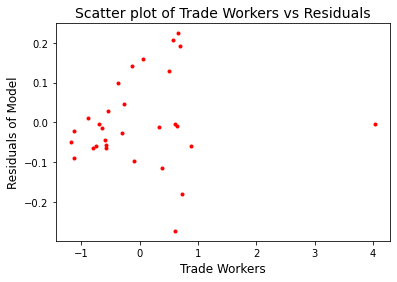

In [134]:
plt.figure()
plt.plot(df_std.T13_1_STOT, res.resid,color='r',linestyle='None',marker='.')
plt.ylabel('Residuals of Model',fontsize=12)
plt.xlabel('Trade Workers',fontsize=12)
plt.title('Scatter plot of Trade Workers vs Residuals',fontsize=14)

Our variance may not be constant as the variability of Trade Worker observations is much lower than for higher Trade Worker observations. We should be cautious of this.

B. Census data is inherently recorded randomly from the entire population.

C. If the quantiles of our residuals distribution are relatively similar to normal distribution they will map to that of normal distribution. So we will check this.

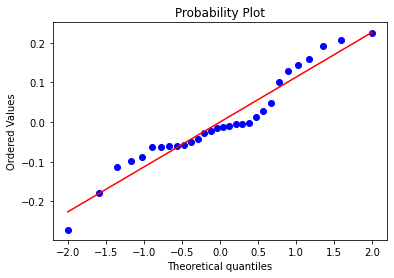

In [136]:
# We can use the probplot function to create a qqplot for our residuals across normal distribution.
plt.figure()
stats.probplot(res.resid, dist='norm',plot=plt);

Here we can see quite a little amount of deviation from our normal distribution in our residuals. This deviation is not considerable. Now we will perform a Shapiro Wilk Normality Test for a P value < 0.05. This will check if our model is statistically different from normal. 

In [137]:
stats.shapiro(res.resid)

ShapiroResult(statistic=0.9450559020042419, pvalue=0.12448438256978989)

Our P-Value here is greater than 0.05. So this is confirming that our data is not significantly different from normal distribution. We can assume normality.

D. Our scatter plot between Trade Workers and Van Drivers would be indicative of linearity of parameters as there was no strong non linear pattern in the data.

E. To check this we must calculate the mean of the residuals.

In [138]:
res.resid.mean()

-9.159339953157541e-17

As this number is very close to zero, we will continue as though the mean of our residuals is zero. 

F. As this is Census data, there is variation in the explanatory variable.

Now that all our assumptions have been met we can interpret our regression model. Our Hypothesis test for our variables will be as follows HO: Beta = 0, HA: Beta != 0, our alpha will be 0.05.

In [126]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             T13_1_STOT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           3.71e-18
Time:                        18:31:23   Log-Likelihood:                 23.483
No. Observations:                  30   AIC:                            -28.97
Df Residuals:                      21   BIC:                            -16.36
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.214e-16      0.024   5.03e-15      1.0

The F-statistic is the test for significance for our entire regression, as it's Pvalue is 3.71e-18 < 0.05, our regression as a whole is statistically significant. We find 2 variables that are statistically significant for predicting whether someone is a trade worker. These variables are driving a van and driving a car. This is due to their respective P values being less than 0.05. For our remaining explanatory variables, we fail to reject our Null hypothesis. 

Our coefficient of determination R squared measures how the differences in the number of trade workers can be explained by the differences in choice of transportation. So in our case, we can say that 98.7% of our data fit with our regression model. However, it would actually be better for us to use adjusted R-squared, because as we add in independent variables we could be artificially increasing R-Squared. Here, we can say that 98.3% of our data fit with our regression model.

### 5. Conclusion

##### Interpretation

The research in this project has demonstrated the following:

1. That Dublin workers and students have a higher variation in transport options than the rest of the country.

2. Dublin workers are more likely to work in traditionally higher paying occupations such as managers, directors, senior officials and professional occupations.

3. Outside of Dublin workers are more likely to work as Skilled Tradesmen and Process, plant and machine operatives.

4. It was shown that Dublin Workers when compared to Non-Dublin workers are more likely to walk to work than Students are. Furthermore, it was shown that this may be partially caused by college students outside of Dublin living nearby campus more often than the average Dublin Student.

5. It was shown that Car Drivers and Car Passengers have a stronger relationship outside of Dublin than inside indicating that workers outside of Dublin are more likely to be giving lifts to passengers than Dublin Workers.

6. A least squares linear regression model was created with Skilled trademen as the response variable and transport methods as independent variables. All assumptions for linear regression were checked, explained and proven as potentially true. The linear model lends substantial support to the claim that transport networks put in place by governments to allow for more efficient travel do in fact have a tangible impact in terms of the occupations that people are in. Counties with less access to train, dart, luas and bus services are more likely to use cars or vans to travel which has a significant effect on the chances of them being trade workers. However, the direction of this relationship is unclear. 

From our research, we have found a considerable amount of differences between the inside and outside of Dublin. There is considerable evidence to show that transport methods can be a predictor of a persons occupation in the country. This is a finding that is not without consequence. It is undoubtable that Dublin has a vastly different amount of travelling efficiency, with the requirement to own a car far lower than it is outside. Secondly, Dublin has more people in more higher paying managerial and proffessional occupations. It is also clear that these workers are not so much required to travel with passengers (children or otherwise) than outside of Dublin. These are advantages to the county. It is clear that counties outside of Dublin do not have access to the same transport network that Dublin does. Predominantly leaving those outside of Dublin to require cars and vans to move to work or schooling. As we have shown, these transport methods largely predict towards a different type of work, trade workers. This poses an interesting dilema: 

Transport networks aren't usually decided by democratic means. They are decided by a series of decisions made to tackle certain issues at a given time. A question worth asking ourselves is, do the jobs create the transport networks or do the transport networks create the jobs. Whilst these networks may be made to meet an excess demand for transport at a given time. It can be hard to tell whether the advantages to one area may have knock on consquences for another. There is a question of equity that must be asked when one county has a rapid tram and trainline to itself. Dublin has had a population increase by around 34% since the DART opened in 1984. According to the CSO, the average Dublin worker is paid 9% above the national median. All of this, whilst being the 3rd smallest county. A question that should be raised is "Would these advantages exist if they did not have access to a different transport network?". Are transport networks made to respond to rising populations creating a feedback loop causing rising populations and higher level occupations for one area, whilst reducing the job standards in the rest of the country. 

Unfortunately, due to the limitations of the assignment and my time, I was not able to create a prediction model of transports on the roles of Managers, directors and senior officials. This is an area that requires further investigation. Whilst, we cannot say for certain, it seems possible to me, that the travel networks in Dublin lead to a greater number of higher level positions and in turn higher property values, higher cost of living, higher business earnings etc. There is also the question of whether education levels can be affected by transport networks. As a considerable amount of this project was discussing students, it would be interesting to expand our understanding in how they are being affected. The great thing about the census is it gives future generations the opportunity to learn from the past and data analytics gives them the tools to find the patterns in our history. 